**Vorlesung 'Logik und modelltheoretische Semantik'**

# Demo: kompositionelle Semantik mit NLTK

In [2]:
import nltk
read_expr = nltk.sem.Expression.fromstring


- **NLTK-Kapitel 10: *'Analyzing the Meaning of Sentences'*: https://www.nltk.org/book/ch10.html**
- **http://www.katrinerk.com/courses/python-worksheets/demo-computational-semantics-in-nltk**


---
## 1. Formale Semantik: Bedeutungsrepräsentation und Inferenz

- ***NLTK-Kapitel 10***: Anschluss an *NLTK-Kapitel 8 und 9* (Parser und *feature-based grammars*):

    - **Bedeutungsrepräsentation natürlichsprachlicher Ausdrücke** durch *feature-based grammars* mit ***semantischen Merkmalen***
    - **kompositionelle Semantik** durch ***Lamda-Terme*** für kompositionale Zusammensetzung der Satzbedeutung aus Teilenausdrücken
 
  
   - *(**Inferenz** durch *Theorem-Beweiser* zur Evaluation logischer Formeln)*
        - *`Prover9`-Beweiser muss extra installiert werden (wird hier nicht gezeigt)*




- **Logik als Metasprache** (für Bedeutungsrepräsentation):
    - semantische Analyse als ***Übersetzung*** Satz **in logische Formel**
    - Überprüfung ***Konsistenz*** von Satzmengen
    - *vgl. 1.1: Übersetzung natürlichsprachlicher Anfrage in SQL (als alternative Metasprache)*

---
## 2. Demo: Kompositionelle Semantik mit NLTK

#### Folgende Beispiele ([Demo von Katrin Erk](http://www.katrinerk.com/courses/python-worksheets/demo-computational-semantics-in-nltk)) zeigen die Verwendung von semantischen Merkmalen und Lambda-Termen in einer *feature-based grammar* zur Bedeutungsrepräsentation:


sentence: Vincent sleeps 

(S (NP (PN Vincent)) (VP (IV sleeps))) 



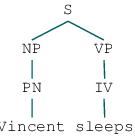


sentence: Vincent loves Mia 

(S (NP (PN Vincent)) (VP (TV loves) (NP (PN Mia)))) 



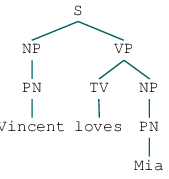

In [3]:
## http://www.katrinerk.com/courses/python-worksheets/demo-computational-semantics-in-nltk

#######
# The following grammar shows how to do syntactic analysis
# with context-free grammar in NLTK.
# There is no semantics construction in this grammar.

    
gramstring = r"""
% start S

S -> NP VP

NP -> PN

VP -> IV
VP -> TV NP

PN -> 'Vincent'
PN -> 'Mia'

IV -> 'sleeps'
TV -> 'loves'
"""

grammar = nltk.grammar.CFG.fromstring(gramstring)

parser = nltk.parse.ChartParser(grammar)

inputs = ["Vincent sleeps", "Vincent loves Mia"]

for sent in inputs:
    print("\nsentence:", sent, "\n")
    trees = parser.parse(sent.split())
    for tree in trees:
        print(tree, "\n")
        display(tree)


sentence: Vincent sleeps
representation: sleep(vincent) 

(S[SEM=<sleep(vincent)>]
  (NP[SEM=<vincent>] (PN[SEM=<vincent>] Vincent))
  (VP[SEM=<\x.sleep(x)>] (IV[SEM=<\x.sleep(x)>] sleeps)))


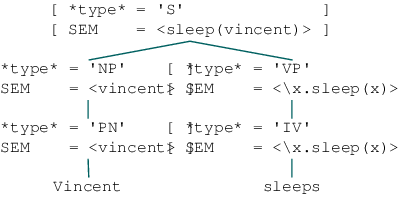


sentence: Vincent loves Mia
representation: love(vincent,mia) 

(S[SEM=<love(vincent,mia)>]
  (NP[SEM=<vincent>] (PN[SEM=<vincent>] Vincent))
  (VP[SEM=<\x.love(x,mia)>]
    (TV[SEM=<\y x.love(x,y)>] loves)
    (NP[SEM=<mia>] (PN[SEM=<mia>] Mia))))


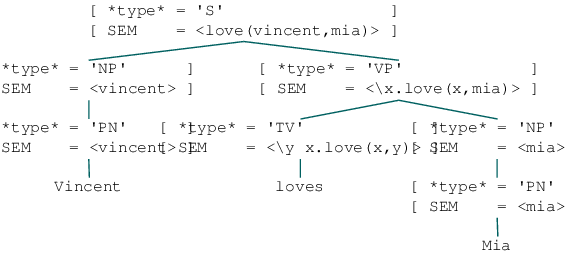

In [4]:
## http://www.katrinerk.com/courses/python-worksheets/demo-computational-semantics-in-nltk


#######
# Now we add semantics. We do this in brackets after each nonterminal (constituent or POS label).
# The following grammar only has proper nouns, no other NPs,
# and represents Vincent as simply "vincent", of type e.
gramstring = r"""
% start S

S[SEM = <?vp(?np)>] -> NP[SEM=?np] VP[SEM=?vp]

NP[SEM=?pn] -> PN[SEM=?pn]

VP[SEM=?v] -> IV[SEM=?v]
VP[SEM=<?v(?np)>] -> TV[SEM=?v] NP[SEM=?np]

PN[SEM=<vincent>] -> 'Vincent'
PN[SEM=<mia>] -> 'Mia'

IV[SEM=<\x.sleep(x)>] -> 'sleeps'
TV[SEM=<\y x.love(x,y)>] -> 'loves'
"""

grammar = nltk.grammar.FeatureGrammar.fromstring(gramstring)

parser = nltk.parse.FeatureChartParser(grammar)


inputs = ["Vincent sleeps", "Vincent loves Mia"]

for sent in inputs:
    print("\nsentence:", sent)
    trees = parser.parse(sent.split())
    for tree in trees:
        print("representation:",tree.label()['SEM'], "\n")        
        print(tree)
        display(tree)


sentence: Vincent sleeps
representation: sleep(vincent) 

(S[SEM=<sleep(vincent)>]
  (NP[SEM=<\P.P(vincent)>] (PN[SEM=<\P.P(vincent)>] Vincent))
  (VP[SEM=<\x.sleep(x)>] (IV[SEM=<\x.sleep(x)>] sleeps))) 



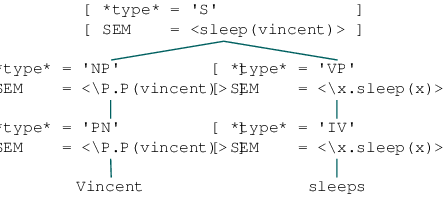


sentence: Mia loves every robber
representation: all z1.(robber(z1) -> love(mia,z1)) 

(S[SEM=<all z1.(robber(z1) -> love(mia,z1))>]
  (NP[SEM=<\P.P(mia)>] (PN[SEM=<\P.P(mia)>] Mia))
  (VP[SEM=<\x.all z1.(robber(z1) -> love(x,z1))>]
    (TV[SEM=<\X x.X(\y.love(x,y))>] loves)
    (NP[SEM=<\Q.all x.(robber(x) -> Q(x))>]
      (Det[SEM=<\P Q.all x.(P(x) -> Q(x))>] every)
      (N[SEM=<\x.robber(x)>] robber)))) 



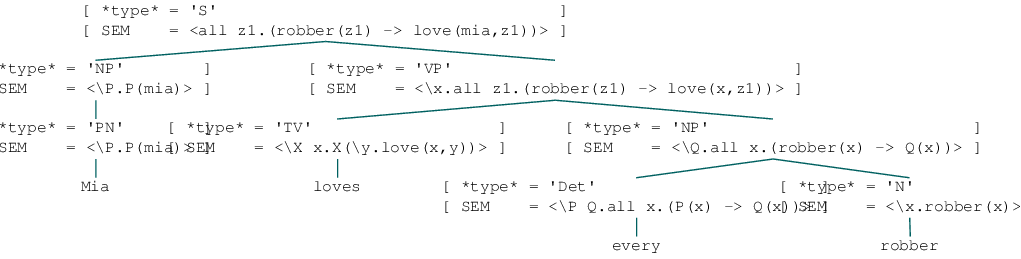

In [5]:
## http://www.katrinerk.com/courses/python-worksheets/demo-computational-semantics-in-nltk

#######
# The following grammar has noun phrases that are either
# proper nouns or Det N.
# Noun phrases are of type <<e, t>, t>
gramstring = r"""
% start S

S[SEM = <?np(?vp)>] -> NP[SEM=?np] VP[SEM=?vp]

NP[SEM=?pn] -> PN[SEM=?pn]
NP[SEM=<?det(?n)>] -> Det[SEM=?det] N[SEM=?n]

VP[SEM=?v] -> IV[SEM=?v]
VP[SEM=<?v(?np)>] -> TV[SEM=?v] NP[SEM=?np]

PN[SEM=<\P.P(vincent)>] -> 'Vincent'
PN[SEM=<\P.P(mia)>] -> 'Mia'

N[SEM=<\x.robber(x)>] -> 'robber'

Det[SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'every'

IV[SEM=<\x.sleep(x)>] -> 'sleeps'
TV[SEM=<\X x.X(\y.love(x,y))>] -> 'loves'
"""

grammar = nltk.grammar.FeatureGrammar.fromstring(gramstring)

parser = nltk.parse.FeatureChartParser(grammar)

inputs = ["Vincent sleeps", "Mia loves every robber"]

for sent in inputs:
    print("\nsentence:", sent)
    trees = parser.parse(sent.split())
    for tree in trees:
        print("representation:",tree.label()['SEM'], "\n")
        print(tree, "\n")
        display(tree)        